<div style="text-align: center; font-size: 36px; color: purple; font-weight: bold;">
    Web Scraping Real Estate Articles from Yahoo Finance using Scrapy
</div>


<div style="color: #a855f7; font-size: 24px; font-weight: bold;">Project Overview</div>

This project aims to develop a web scraping solution to extract and consolidate real estate articles from **Yahoo Finance**. By leveraging **Scrapy**, we automate the process of gathering article titles, URLs, publication dates, and content. The extracted data can be structured for further analysis or reporting, providing valuable insights into real estate trends.  

<div style="color: #a855f7; font-size: 24px; font-weight: bold;">Objectives and Scope</div>

- **Objectives:**  
  - Extract real estate articles from Yahoo Finance efficiently.  
  - Organize and store the data in a structured format (CSV/JSON).  
  - Handle pagination, dynamic content, and anti-scraping mechanisms.  
  - *(Optional)* Perform sentiment analysis or identify key trends.  

- **Scope:**  
  - Focuses on Yahoo Finance’s **Real Estate** section.  
  - Extracts article metadata: **title, URL, publication date, and full content**.  
  - Does not include real-time updates or user interactions.  

<div style="color: #a855f7; font-size: 24px; font-weight: bold;">Why Scrapy for Web Scraping?</div>

- **Speed & Efficiency:** Scrapy's asynchronous requests make it faster than traditional methods like BeautifulSoup.  
- **Built-in Features:** Handles pagination, request retries, and data export seamlessly.  
- **Scalability:** Can be extended to scrape multiple websites with minimal modifications.  
- **Data Structuring:** Supports exporting data in CSV, JSON, or databases effortlessly.  

<div style="color: #a855f7; font-size: 24px; font-weight: bold;">Step 1: Setup and Initialization</div>


In [2]:
!pip install transformers
!pip install sumy

In [4]:
!pip install yfinance


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
import os
import networkx as nx
from itertools import combinations

import requests
from bs4 import BeautifulSoup
import time


import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import yfinance as yf
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

<div style="color: #a855f7; font-size: 24px; font-weight: bold;"> Step 2:  Fetch trending stocks from Yahoo Finance
</div>


In [8]:
# Function to fetch trending stocks from Yahoo Finance
def get_trending_stocks():
    url = "https://finance.yahoo.com/markets/stocks/trending/"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    stocks = []
    
    for row in soup.select("table tbody tr"):  # Selecting stock rows
        try:
            symbol = row.select_one("td:nth-child(1) a").text.strip()
            stocks.append(symbol)
        except AttributeError:
            continue
    return stocks

In [10]:
# Function to fetch top 10 stocks from Real estate sector
def get_top_tech_stocks():
    url = "https://finance.yahoo.com/sectors/real-estate/"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    stocks = []
    
    table = soup.find("table", class_="expandable-table yf-hhhli1 fixedLayout")
    if not table:
        print("Could not find the technology sector table.")
        return []
    
    for row in table.select("tbody tr")[:10]:  # Selecting top 10 stocks
        try:
            symbol = row.select_one("span.symbol.yf-1fqyif7").text.strip()
            stocks.append(symbol)
        except AttributeError:
            continue
    return stocks

In [10]:
# Function to fetch top 10 stocks from Real estate sector
def get_top_tech_stocks():
    url = "https://finance.yahoo.com/sectors/real-estate/"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    stocks = []
    
    table = soup.find("table", class_="expandable-table yf-hhhli1 fixedLayout")
    if not table:
        print("Could not find the technology sector table.")
        return []
    
    for row in table.select("tbody tr")[:10]:  # Selecting top 10 stocks
        try:
            symbol = row.select_one("span.symbol.yf-1fqyif7").text.strip()
            stocks.append(symbol)
        except AttributeError:
            continue
    return stocks

In [12]:
import requests
from bs4 import BeautifulSoup

# Function to fetch top 10 stocks from the Real Estate sector
def get_top_real_estate_stocks():
    url = "https://finance.yahoo.com/sectors/real-estate/"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    stocks = []

    # Locate the table with relevant stock information
    table = soup.find("table", {"class": "expandable-table yf-hhhli1 fixedLayout"})
    if not table:
        print("Could not find the real estate sector table.")
        return []

    # Extract the top 10 stocks
    for row in table.select("tbody tr")[:10]:  # Selecting top 10 stocks
        try:
            symbol = row.select_one("a[data-testid='table-cell-ticker']").text.strip()
            name = row.select_one("span.longName").text.strip()
            last_price = row.select("td")[1].text.strip()
            market_cap = row.select("td")[4].text.strip()

            stocks.append({
                "Symbol": symbol,
                "Name": name,
                "Last Price": last_price,
                "Market Cap": market_cap
            })
        except AttributeError:
            continue

    return stocks

# Fetch and print the top 10 stocks in the real estate sector
top_stocks = get_top_real_estate_stocks()
for stock in top_stocks:
    print(stock)


{'Symbol': 'PLD  Prologis, Inc.', 'Name': 'Prologis, Inc.', 'Last Price': '111.89', 'Market Cap': '103.63B'}
{'Symbol': 'AMT  American Tower Corporation', 'Name': 'American Tower Corporation', 'Last Price': '210.93', 'Market Cap': '98.565B'}
{'Symbol': 'WELL  Welltower Inc.', 'Name': 'Welltower Inc.', 'Last Price': '147.84', 'Market Cap': '92.058B'}
{'Symbol': 'EQIX  Equinix, Inc.', 'Name': 'Equinix, Inc.', 'Last Price': '837.68', 'Market Cap': '80.826B'}
{'Symbol': 'SPG  Simon Property Group, Inc.', 'Name': 'Simon Property Group, Inc.', 'Last Price': '161.21', 'Market Cap': '60.53B'}
{'Symbol': 'PSA  Public Storage', 'Name': 'Public Storage', 'Last Price': '298.13', 'Market Cap': '52.227B'}
{'Symbol': 'DLR  Digital Realty Trust, Inc.', 'Name': 'Digital Realty Trust, Inc.', 'Last Price': '148.57', 'Market Cap': '50.233B'}
{'Symbol': 'O  Realty Income Corporation', 'Name': 'Realty Income Corporation', 'Last Price': '56.69', 'Market Cap': '49.616B'}
{'Symbol': 'CCI  Crown Castle Inc.', '

<div style="color: #a855f7; font-size: 24px; font-weight: bold;"> Step 2: Fetch only relevant news article links and titles for a given stock

In [14]:
import requests
from bs4 import BeautifulSoup
import time

# Function to fetch news articles for a given stock
def get_stock_news_links(stock_symbol):
    url = f"https://finance.yahoo.com/quote/{stock_symbol}/news"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    
    # Check if request was successful
    if response.status_code != 200:
        print(f"❌ Error: Unable to fetch data for {stock_symbol} (Status Code: {response.status_code})")
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    news_data = []

    # Try different approaches to extract valid news links
    articles = soup.select("a[href*='/news/']")  # Selects only relevant news links

    if not articles:
        print(f"⚠️ No news articles found for {stock_symbol}. Check Yahoo Finance page structure.")
        return []

    for article in articles:
        try:
            link = article.get("href")
            title = article.text.strip()

            # Ensure full link format
            if link and not link.startswith("http"):
                link = "https://finance.yahoo.com" + link
            
            # Filter out irrelevant or short headlines
            if link and title and len(title.split()) > 4:
                news_data.append((title, link))
        except AttributeError:
            continue  # Skip any problematic articles
    
    return news_data

# Load existing stock symbols
stock_symbols = ["PLD", "AMT", "WELL", "EQIX", "SPG", "PSA", "DLR", "O", "CCI", "CBRE"]

# Scrape news for each stock
news_list = []
for stock in stock_symbols:
    print(f"📡 Fetching news links for {stock}...")
    news_articles = get_stock_news_links(stock)
    for title, link in news_articles:
        news_list.append([stock, title, link])
    time.sleep(2)  # Prevent getting blocked by Yahoo

# Save to CSV
import pandas as pd
df_news = pd.DataFrame(news_list, columns=["Stock Symbol", "News Title", "News Link"])
df_news.to_csv("yahoo_finance_stock_news_realestate.csv", index=False)

print("✅ News articles saved to yahoo_finance_stock_news_realestate.csv")


📡 Fetching news links for PLD...
📡 Fetching news links for AMT...
📡 Fetching news links for WELL...
📡 Fetching news links for EQIX...
📡 Fetching news links for SPG...
📡 Fetching news links for PSA...
📡 Fetching news links for DLR...
📡 Fetching news links for O...
📡 Fetching news links for CCI...
📡 Fetching news links for CBRE...
✅ News articles saved to yahoo_finance_stock_news_realestate.csv


<div style="color: #a855f7; font-size: 24px; font-weight: bold;"> Step 4:  Fetch full news content from each article link

In [15]:
# Function to fetch full news content from each article link
def get_news_content(news_link):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(news_link, headers=headers)
    if response.status_code != 200:
        return "Failed to fetch content"
    
    soup = BeautifulSoup(response.text, 'html.parser')
    paragraphs = soup.select("p")
    content = " ".join([p.text.strip() for p in paragraphs])
    return content

# Load the saved news file
df_news = pd.read_csv("yahoo_finance_stock_news_realestate.csv")
news_content_list = []

for _, row in df_news.iterrows():
    stock, title, link = row["Stock Symbol"], row["News Title"], row["News Link"]
    print(f"Fetching content for: {title}")
    content = get_news_content(link)
    news_content_list.append([stock, title, link, content])
    time.sleep(2)  # Avoid getting blocked

# Save the news content into a new CSV file
df_content = pd.DataFrame(news_content_list, columns=["Stock Symbol", "News Title", "News Link", "News Content"])
df_content.to_csv("yahoo_finance_stock_news_with_content.csv", index=False)
print("News articles with content saved to yahoo_finance_stock_news_realestate_with_content.csv")

Fetching content for: Prologis Inc. (PLD): “Not Talking Enough – Jim Cramer Sees a Bottom in Prologis” We recently published a list of Was Jim Cramer Right About These 16 Stocks?. In this article, we are going to take a look at where Prologis Inc. (NYSE:PLD) stands against other stocks that Jim Cramer discussed 12 months ago during his show on March 18, 2024. On the most recent episode of Mad Money, […]
Fetching content for: Want Decades of Passive Income? Buy This ETF and Hold It Forever. There are some excellent opportunities in the stock market for long-term investors right now, and that's especially true in the world of dividend stocks.  One area of the market that could be an excellent place to look for passive income right now is real estate.  Real estate investment trusts, or REITs, have underperformed the market for the past several years, and the primary reason is the interest rate environment.
Fetching content for: Prologis (PLD) Stock Moves -0.59%: What You Should Know The l

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import networkx as nx
import os
import networkx as nx
from itertools import combinations

import requests
from bs4 import BeautifulSoup
import time


import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import yfinance as yf
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [16]:


# Ensure required NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# 📌 Load dataset
csv_file = "yahoo_finance_stock_news_with_content.csv"
if not os.path.exists(csv_file):
    print(f"🚨 Error: {csv_file} not found. Please generate the file first.")
else:
    df_news = pd.read_csv(csv_file)
    
    # 📌 Custom Stopwords (Common Financial Terms)
    custom_stopwords = set(stopwords.words("english")).union({
        "stock", "stocks", "market", "company", "companies",
        "etf", "index", "investment", "finance", "shares",
        "business", "price", "trading", "fund", "analyst", 
        "news", "financial", "cramer", "vanguard", "cap",
        "option", "zacks", "ai", "seven", "attractive", "look"
    })

    lemmatizer = WordNetLemmatizer()
    
    def clean_text(text):
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters & numbers
        words = word_tokenize(text)  # Tokenize words
        words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords and len(word) > 3]  # Remove stopwords & short words
        return " ".join(words)

    # Apply cleaning function
    df_news["Cleaned Content"] = df_news["News Content"].fillna("").apply(clean_text)

    # Save cleaned data for further processing
    df_news.to_csv("yahoo_finance_stock_news_cleaned.csv", index=False)
    print("✅ Data cleaning completed and saved!")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/safaejdid/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/safaejdid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/safaejdid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/safaejdid/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:

  

    # 📌 Define stock word analysis function
    def stock_word_analysis(stock_symbol):
        stock_df = df_news[df_news["Stock Symbol"] == stock_symbol]

        if stock_df.empty:
            print(f"⚠️ No news articles found for {stock_symbol}. Skipping analysis.")
            return
        
        # Split into positive & negative sentiment
        vectorizer = CountVectorizer(stop_words="english", max_features=50)
        
        pos_text = " ".join(stock_df[stock_df["Sentiment"] == "Positive"]["News Content"])
        neg_text = " ".join(stock_df[stock_df["Sentiment"] == "Negative"]["News Content"])

        # 📌 Skip analysis if there is no valid text
        if not pos_text.strip() and not neg_text.strip():
            print(f"⚠️ No valid content for {stock_symbol}. Skipping analysis.")
            return

        # Ensure there is at least some content before fitting CountVectorizer
        pos_counts = vectorizer.fit_transform([pos_text]) if pos_text.strip() else None
        neg_counts = vectorizer.fit_transform([neg_text]) if neg_text.strip() else None

        # ✅ FIX: Properly check if the sparse matrix is empty
        pos_freq = (
            dict(zip(vectorizer.get_feature_names_out(), pos_counts.toarray()[0]))
            if pos_counts is not None and pos_counts.nnz > 0 else {}
        )
        neg_freq = (
            dict(zip(vectorizer.get_feature_names_out(), neg_counts.toarray()[0]))
            if neg_counts is not None and neg_counts.nnz > 0 else {}
        )

        # 📌 Ensure at least some words exist before plotting
        if not pos_freq and not neg_freq:
            print(f"⚠️ No words found for {stock_symbol}. Skipping plot.")
            return

        # Plot
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        if pos_freq:
            axes[0].barh(list(pos_freq.keys()), list(pos_freq.values()), color="green", align="center")
            axes[0].set_title(f"Common Positive Words for {stock_symbol}", fontsize=14)
            axes[0].set_xlabel("Frequency")
            axes[0].invert_yaxis()
        else:
            axes[0].text(0.5, 0.5, "No Positive Words Found", fontsize=12, ha='center')

        if neg_freq:
            axes[1].barh(list(neg_freq.keys()), list(neg_freq.values()), color="red", align="center")
            axes[1].set_title(f"Common Negative Words for {stock_symbol}", fontsize=14)
            axes[1].set_xlabel("Frequency")
            axes[1].invert_yaxis()
        else:
            axes[1].text(0.5, 0.5, "No Negative Words Found", fontsize=12, ha='center')

        plt.tight_layout()
        plt.show()

    # 📌 Run analysis for all unique stocks
    unique_stocks = df_news["Stock Symbol"].unique()
    for stock in unique_stocks:
        stock_word_analysis(stock)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akanshasinha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akanshasinha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akanshasinha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akanshasinha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


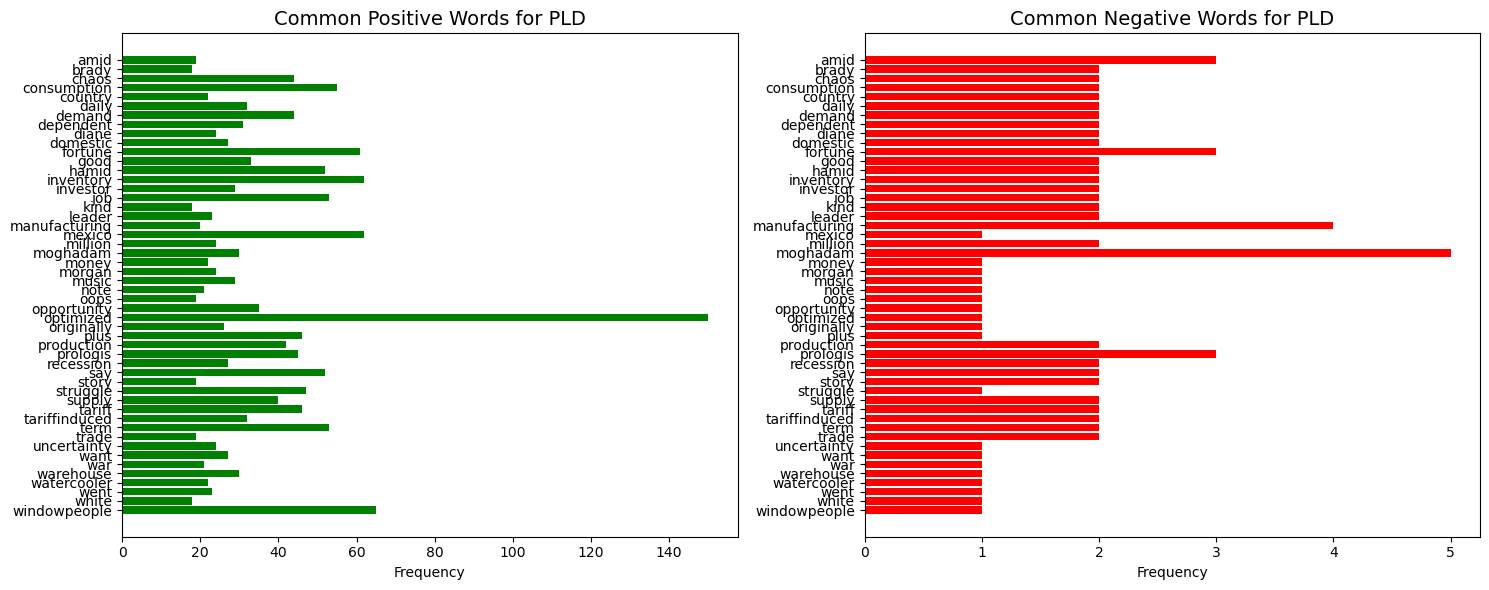

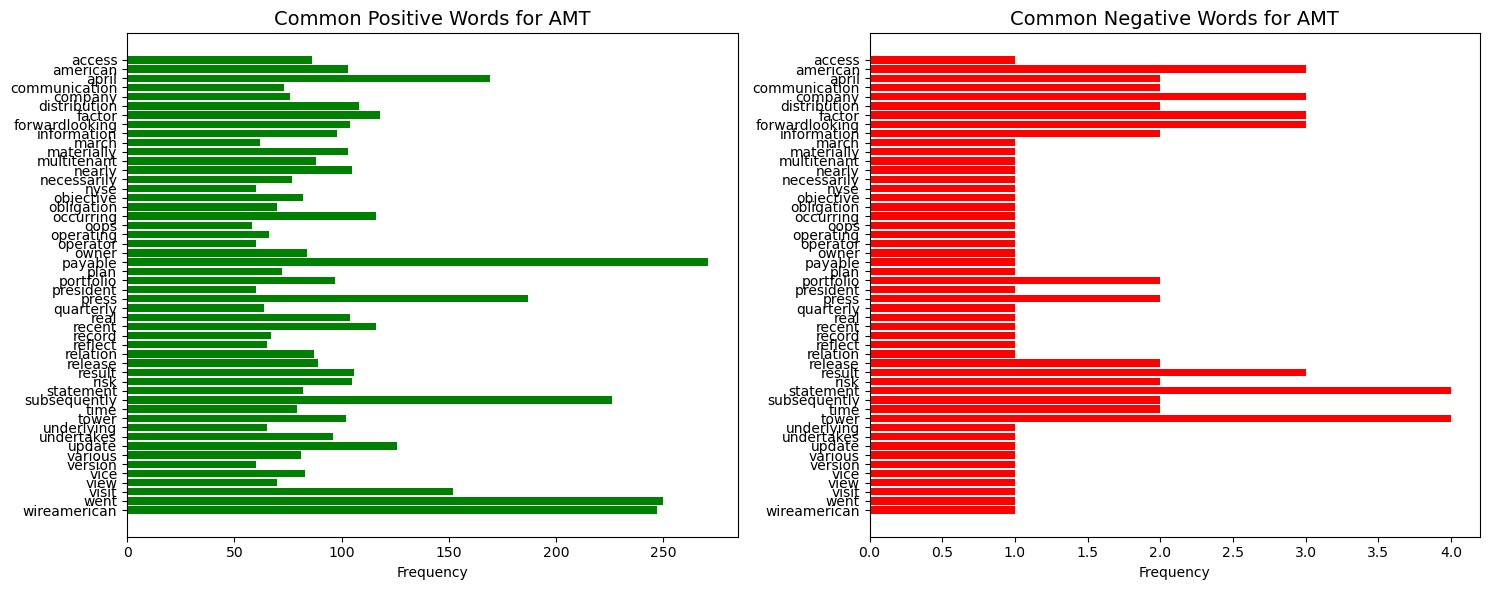

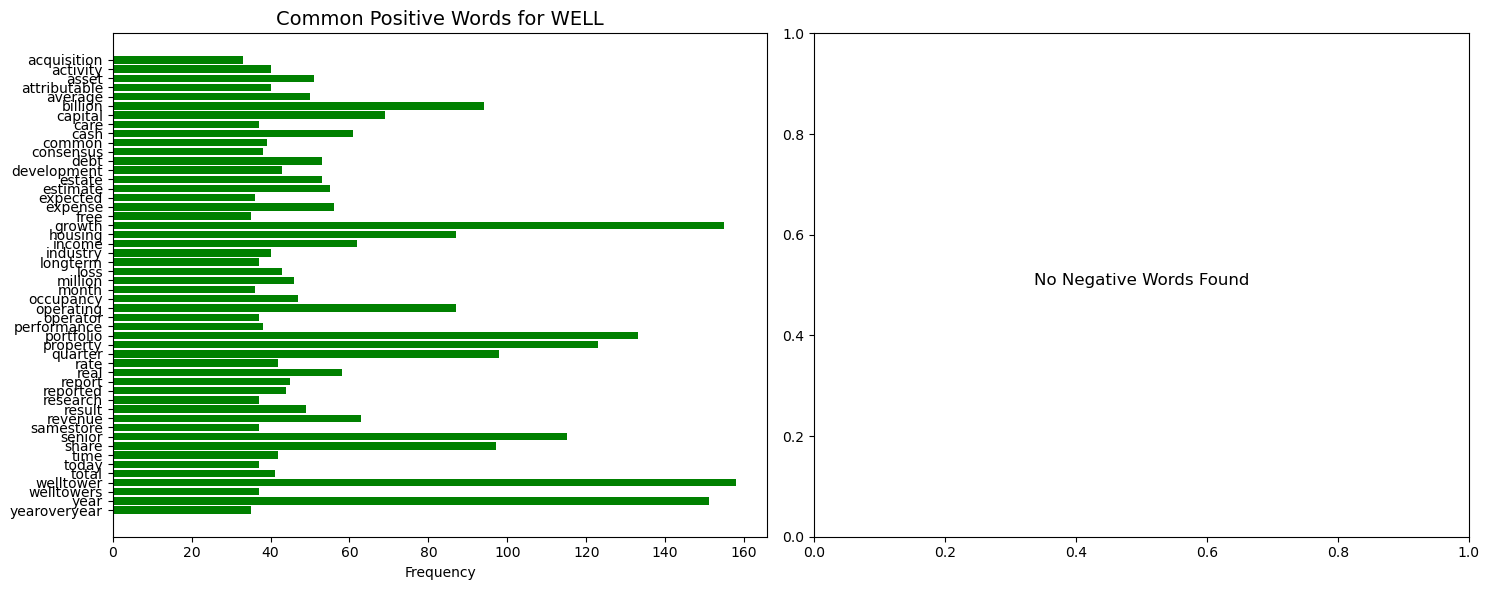

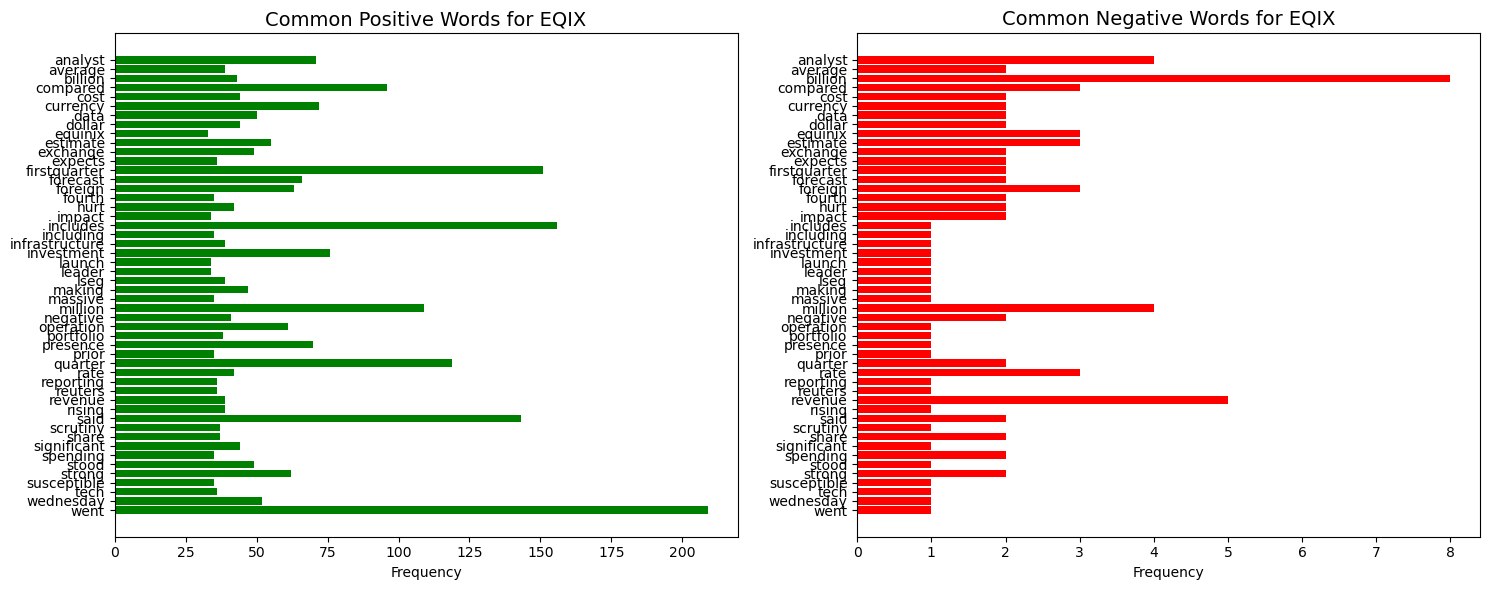

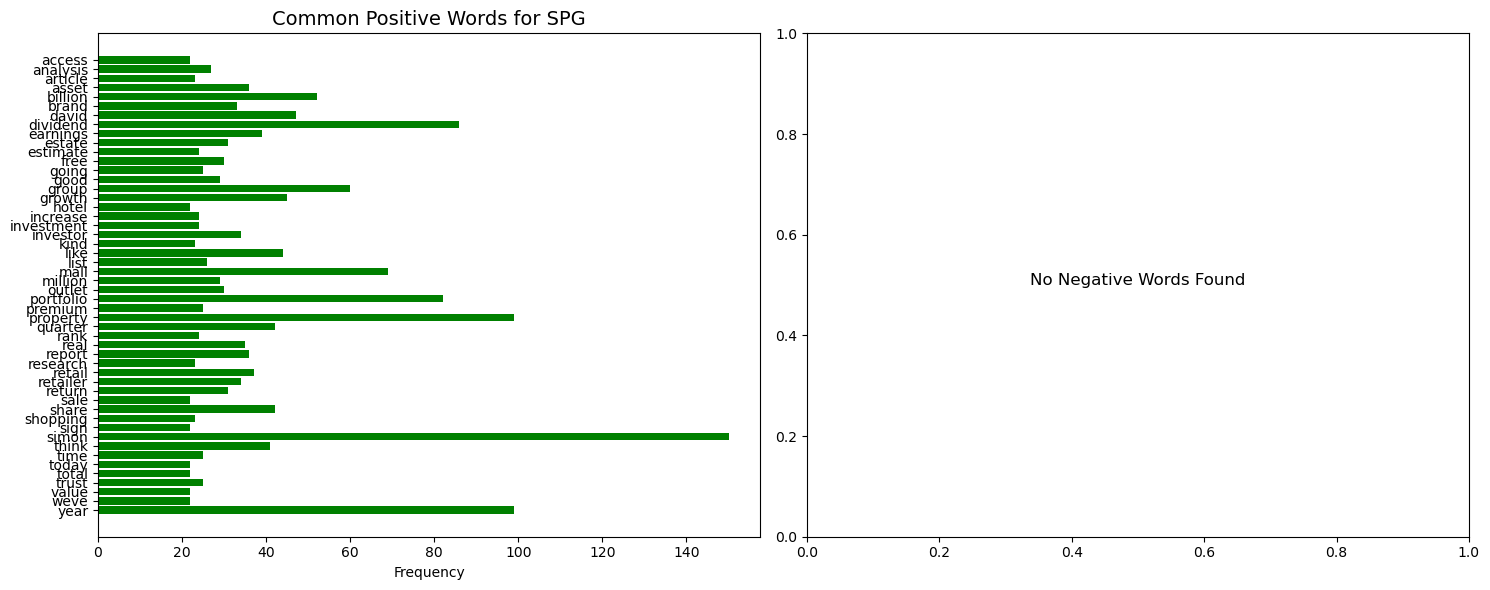

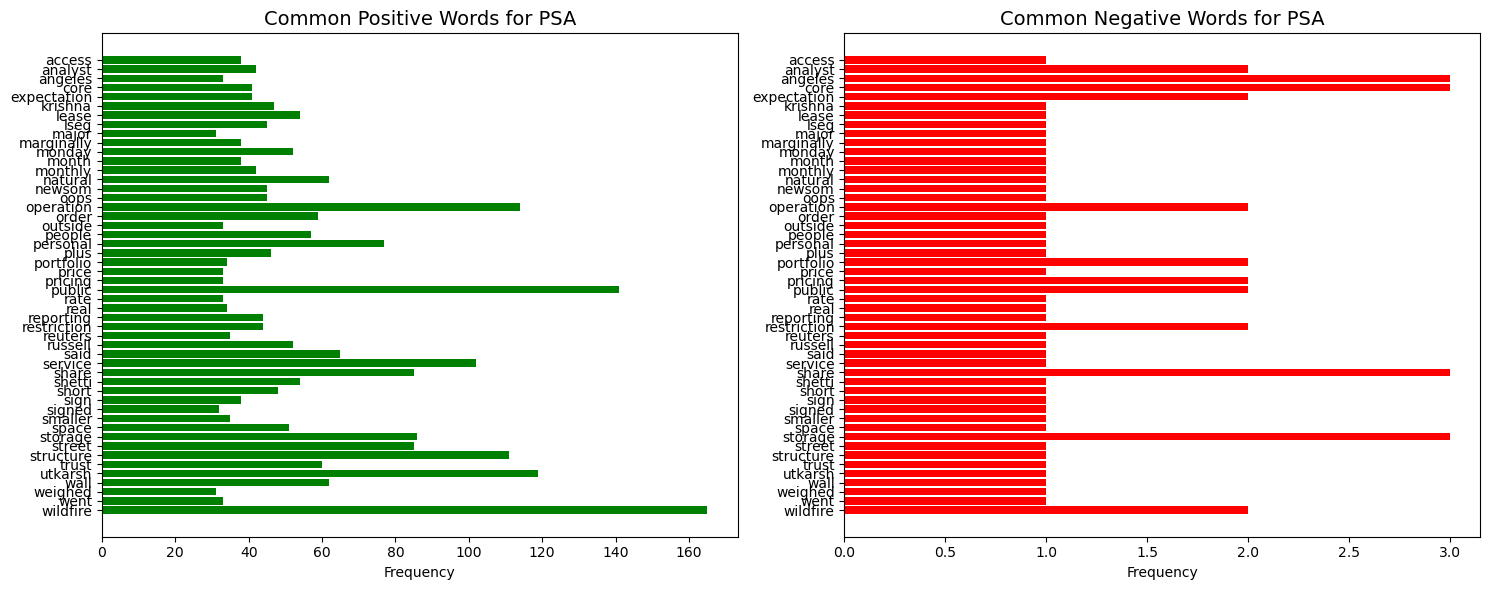

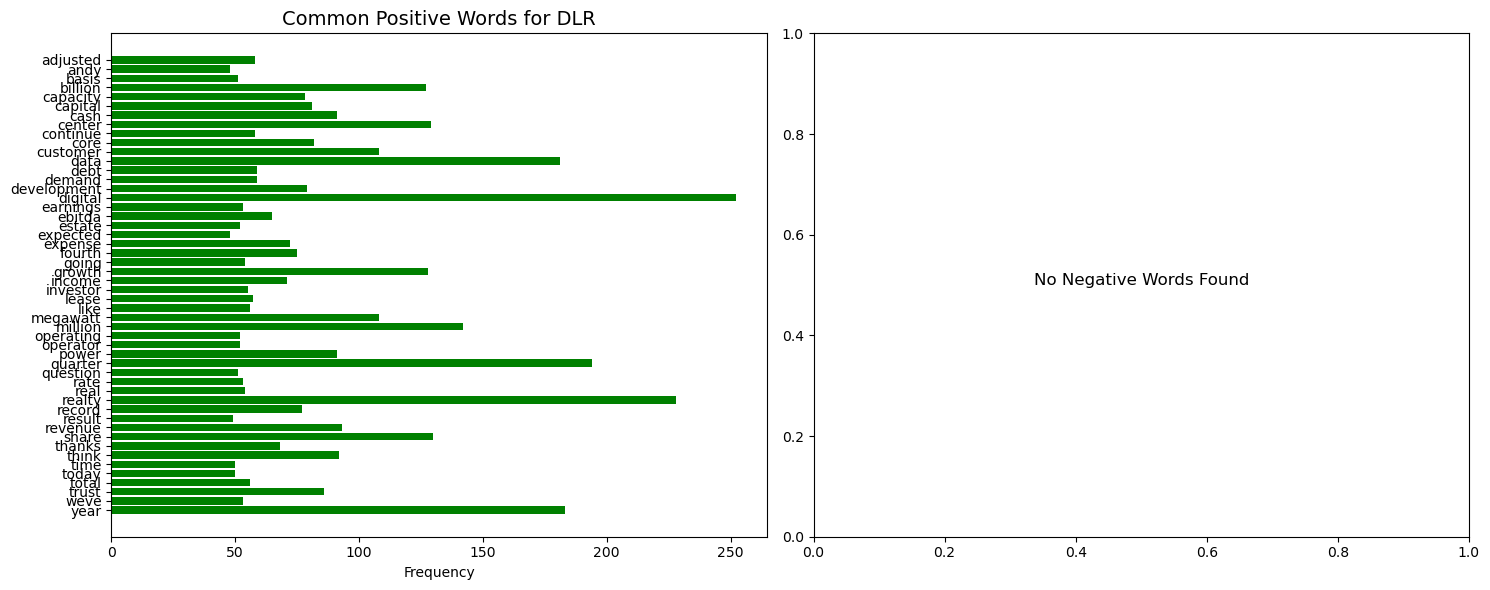

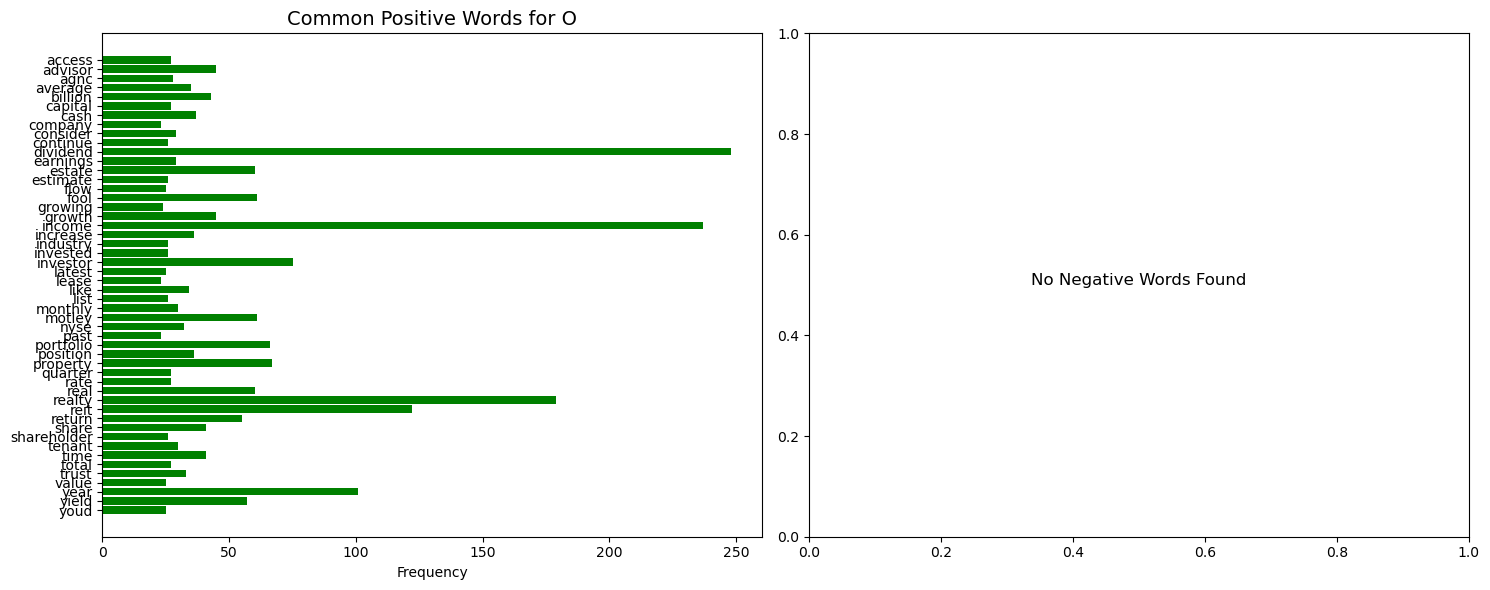

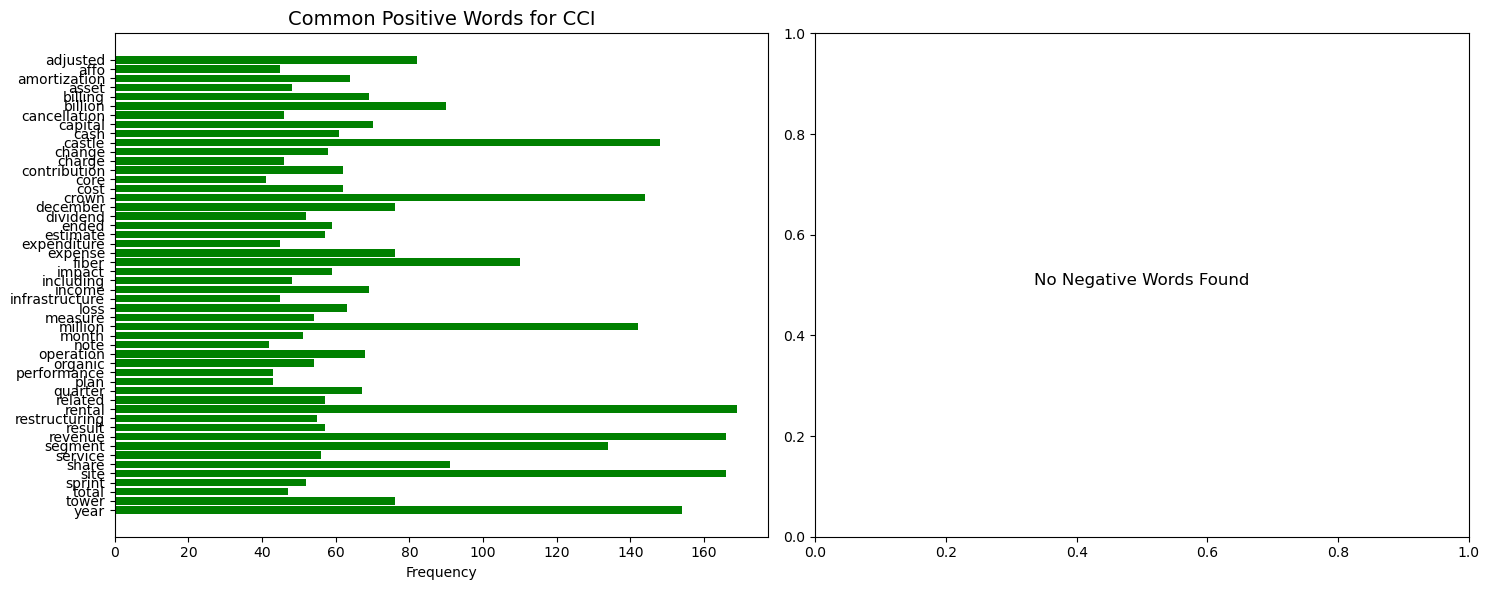

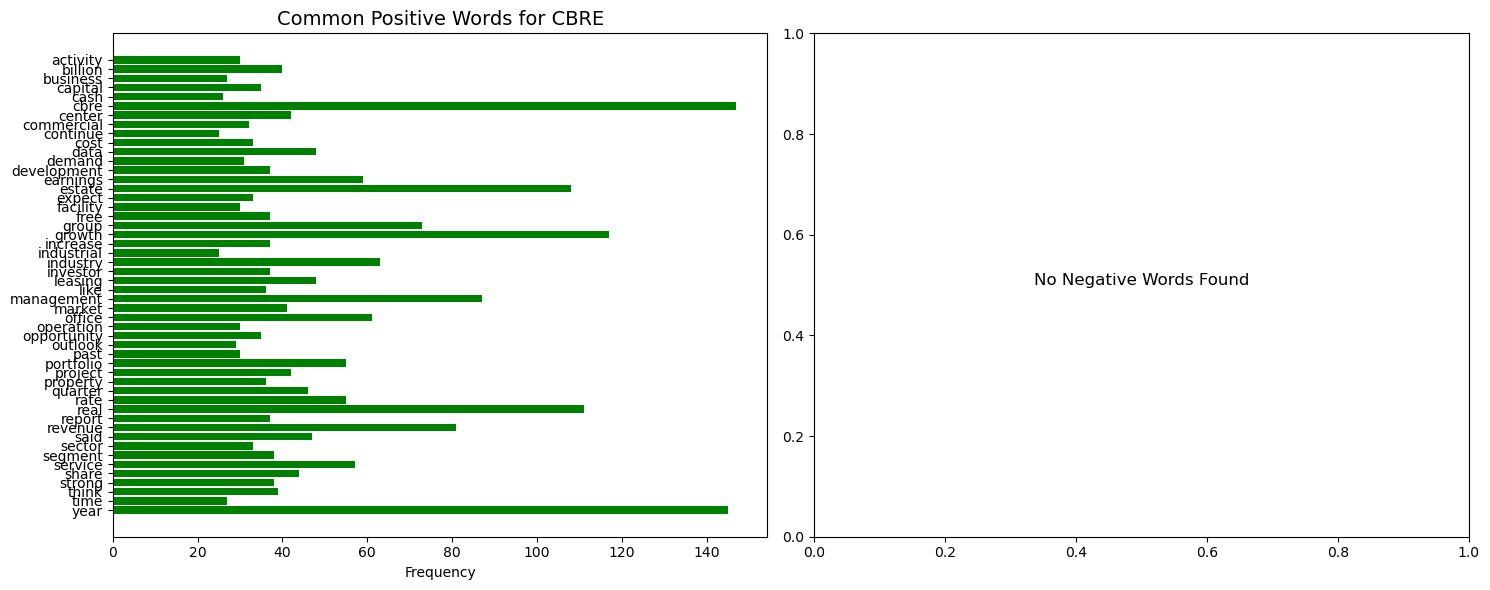

In [37]:
import os
import pandas as pd
import re
import time
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Ensure required NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("vader_lexicon")

# 📌 Load dataset
csv_file = "yahoo_finance_stock_news_cleaned.csv"
if not os.path.exists(csv_file):
    print(f"🚨 Error: {csv_file} not found. Please generate the file first.")
    exit()
else:
    df_news = pd.read_csv(csv_file)
    
    # 📌 Custom Stopwords (Common Financial Terms)
    custom_stopwords = set(stopwords.words("english")).union({
        "stock", "stocks", "market", "company", "companies",
        "etf", "index", "investment", "finance", "shares",
        "business", "price", "trading", "fund", "analyst", 
        "news", "financial", "cramer", "vanguard", "cap",
        "option", "zacks", "ai", "seven", "attractive", "look"
    })

    lemmatizer = WordNetLemmatizer()

    def clean_text(text):
        if pd.isna(text):
            return ""
        text = text.lower()  # Convert to lowercase
        text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters & numbers
        words = word_tokenize(text)  # Tokenize words
        words = [lemmatizer.lemmatize(word) for word in words if word not in custom_stopwords and len(word) > 3]  # Remove stopwords & short words
        return " ".join(words)

    # Apply cleaning function if Cleaned Content is missing
    if "Cleaned Content" not in df_news.columns:
        df_news["Cleaned Content"] = df_news["News Content"].fillna("").apply(clean_text)
        df_news.to_csv(csv_file, index=False)
        print("✅ Data cleaned and updated!")

    # 📌 Ensure "Sentiment" column exists
    if "Sentiment" not in df_news.columns:
        print("⚠️ Sentiment column missing! Generating sentiment scores...")
        sia = SentimentIntensityAnalyzer()

        def get_sentiment(text):
            sentiment_score = sia.polarity_scores(text)["compound"]
            if sentiment_score >= 0.05:
                return "Positive"
            elif sentiment_score <= -0.05:
                return "Negative"
            else:
                return "Neutral"

        df_news["Sentiment"] = df_news["Cleaned Content"].apply(get_sentiment)
        df_news.to_csv(csv_file, index=False)
        print("✅ Sentiment column added & saved!")

# 📌 Define stock word analysis function
def stock_word_analysis(stock_symbol):
    stock_df = df_news[df_news["Stock Symbol"] == stock_symbol]

    if stock_df.empty:
        print(f"⚠️ No news articles found for {stock_symbol}. Skipping analysis.")
        return

    # Extract positive & negative text
    pos_text = " ".join(stock_df[stock_df["Sentiment"] == "Positive"]["Cleaned Content"].dropna())
    neg_text = " ".join(stock_df[stock_df["Sentiment"] == "Negative"]["Cleaned Content"].dropna())

    # Skip if no valid text
    if not pos_text.strip() and not neg_text.strip():
        print(f"⚠️ No valid content for {stock_symbol}. Skipping analysis.")
        return

    vectorizer = CountVectorizer(stop_words="english", max_features=50)

    pos_counts = vectorizer.fit_transform([pos_text]) if pos_text.strip() else None
    neg_counts = vectorizer.fit_transform([neg_text]) if neg_text.strip() else None

    pos_freq = (
        dict(zip(vectorizer.get_feature_names_out(), pos_counts.toarray()[0]))
        if pos_counts is not None and pos_counts.nnz > 0 else {}
    )
    neg_freq = (
        dict(zip(vectorizer.get_feature_names_out(), neg_counts.toarray()[0]))
        if neg_counts is not None and neg_counts.nnz > 0 else {}
    )

    if not pos_freq and not neg_freq:
        print(f"⚠️ No words found for {stock_symbol}. Skipping plot.")
        return

    # Plot Word Frequency
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    if pos_freq:
        axes[0].barh(list(pos_freq.keys()), list(pos_freq.values()), color="green", align="center")
        axes[0].set_title(f"Common Positive Words for {stock_symbol}", fontsize=14)
        axes[0].set_xlabel("Frequency")
        axes[0].invert_yaxis()
    else:
        axes[0].text(0.5, 0.5, "No Positive Words Found", fontsize=12, ha='center')

    if neg_freq:
        axes[1].barh(list(neg_freq.keys()), list(neg_freq.values()), color="red", align="center")
        axes[1].set_title(f"Common Negative Words for {stock_symbol}", fontsize=14)
        axes[1].set_xlabel("Frequency")
        axes[1].invert_yaxis()
    else:
        axes[1].text(0.5, 0.5, "No Negative Words Found", fontsize=12, ha='center')

    plt.tight_layout()
    plt.show()

# 📌 Run analysis for all unique stocks
unique_stocks = df_news["Stock Symbol"].unique()
for stock in unique_stocks:
    stock_word_analysis(stock)


In [ ]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import matplotlib.pyplot as plt

# Reload dataset (assuming the user has the correct file)
csv_file = "yahoo_finance_stock_news_cleaned.csv"
df_news = pd.read_csv(csv_file)

# Ensure 'Sentiment' column exists
if "Sentiment" in df_news.columns and "Stock Symbol" in df_news.columns:
    stock_sentiment = df_news.groupby("Stock Symbol")["Sentiment"].value_counts().unstack().fillna(0)
    stock_sentiment["Positive Ratio"] = stock_sentiment["Positive"] / (stock_sentiment.sum(axis=1))
    
    # Plot with pink color for positive sentiment
    plt.figure(figsize=(12,6))
    stock_sentiment["Positive Ratio"].sort_values(ascending=False).head(10).plot(kind="bar", color="pink")
    plt.title("Top 10 Most Positive Stocks in News")
    plt.xlabel("Stock Symbol")
    plt.ylabel("Positive Sentiment Ratio")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Error: Required columns not found in dataset.")


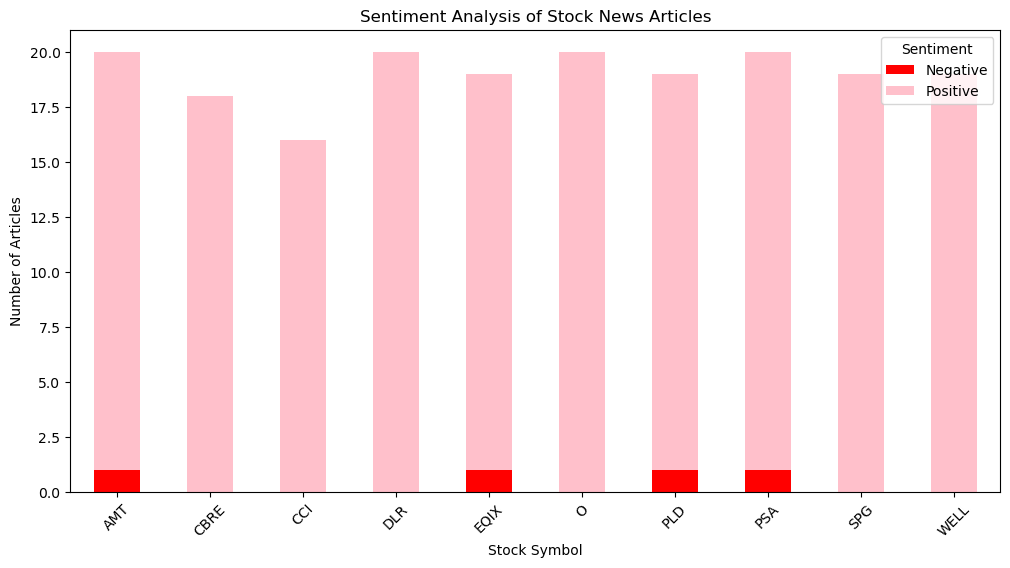

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df_news = pd.read_csv("yahoo_finance_stock_news_cleaned.csv")

# Ensure "Sentiment" column exists
if "Sentiment" not in df_news.columns:
    raise KeyError("The dataset is missing the 'Sentiment' column.")

# Group by stock symbol and sentiment
sentiment_counts = df_news.groupby(["Stock Symbol", "Sentiment"]).size().unstack().fillna(0)

# Define colors for each sentiment category
sentiment_colors = {
    "Positive": "pink",
    "Negative": "red",
    "Neutral": "beige"
}

# Plot Sentiment Analysis per Stock
sentiment_counts.plot(kind="bar", stacked=True, figsize=(12,6), color=[sentiment_colors[col] for col in sentiment_counts.columns])
plt.title("Sentiment Analysis of Stock News Articles")
plt.xlabel("Stock Symbol")
plt.ylabel("Number of Articles")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)
plt.show()



In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for positive and negative sentiments
positive_words = ' '.join(df[df['sentiment'] == 'positive']['text'])
negative_words = ' '.join(df[df['sentiment'] == 'negative']['text'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

wordcloud_positive = WordCloud(width=400, height=300, background_color='white').generate(positive_words)
wordcloud_negative = WordCloud(width=400, height=300, background_color='black').generate(negative_words)

axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('Word Cloud - Positive Sentiments')
axes[0].axis('off')

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('Word Cloud - Negative Sentiments')
axes[1].axis('off')

plt.show()


NameError: name 'df' is not defined